In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import qutip as qt
import math

In [2]:
def gaussian(_t, _mu=0., _sigma=1.):
    x = float(_t-_mu) / _sigma
    return math.exp( - x*x/2.) / math.sqrt(2 * np.pi) / _sigma

In [3]:
def g_u_gaussian(_t, _args):
    mu = _args['mu']
    sigma = _args['sigma']
    denominator = np.sqrt(1 - 1/(4 * np.sqrt(np.pi) * sigma) * 
                          (sp.special.erf((_t-mu)/sigma) + sp.special.erf(mu/sigma)))
    return np.conj(gaussian(_t, mu, sigma)) / denominator

In [4]:
tlist = np.linspace(0, 12, 10000)
gaussian_values = [ gaussian(t,4.) for t in tlist ]
g_u_gaussian_sq = [ np.abs(g_u_gaussian(t,_args={'mu':4,'sigma':1}))**2 for t in tlist]
adaga_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/adaga_expect_values.dat")
cdagc_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/cdagc_expect_values.dat")

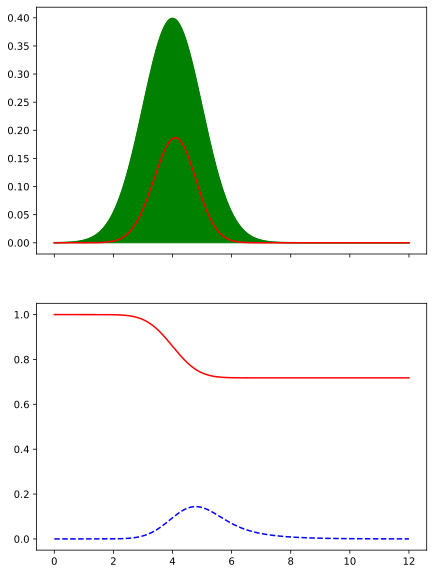

In [5]:
#fig, (ax1, ax2) = plt.subplots(2,1)
#fig.set_figheight(7)
#fig.set_figwidth(10)
fig = plt.figure(figsize=(7,10))
ax1 = fig.add_subplot(211)
plt.plot(tlist, gaussian_values, '-g', tlist, g_u_gaussian_sq, '-r')
plt.fill_between(tlist, gaussian_values, color='green')
#plt.set_xlim(0, 12)
#plt.set_xticks([0., 2, 4, 6, 8, 10, 12],
#               labels=["$0$", "$2$", "$4$", "$6$", "$8$", "$10$", "$12$"])
#plt.set_yticks([-0.8, 0, 0.8], labels=["$-0.8$", "$0$", "$0.8$"])
plt.tick_params('x', labelsize=12)
plt.tick_params('x', labelbottom=False)

ax2 = fig.add_subplot(212, sharex=ax1)
plt.plot(tlist, adaga_expect_values, '-r', tlist, cdagc_expect_values, '--b')

plt.show()

In [6]:
audagau_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/audagau_expect_values.dat")
cdagc_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/cdagc_expect_values.dat")
avdagav_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/avdagav_expect_values.dat")

FileNotFoundError: ../outputs/results_kiilerichmolmer_qp_fig4/audagau_expect_values.dat not found.